In [1]:
import pandas as pd
import numpy as np

In [2]:
dataframe = pd.read_csv('daily-total-female-births-CA.xls',header = 0)

In [3]:
dataframe.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [4]:
dataframe['date'].dtype

dtype('O')

In [5]:
df2 = pd.read_csv('daily-total-female-births-CA.xls', header = 0, parse_dates = [0])

In [6]:
df2.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [7]:
df2['date'].dtype

dtype('<M8[ns]')

In [8]:
#The [ns] means the nano second-based time format that specifies the precision of the DateTime object

In [9]:
Series = pd.read_csv('daily-total-female-births-CA.xls', header = 0, parse_dates = [0], index_col = 0).squeeze("columns")

In [10]:
Series.head()

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: births, dtype: int64

header = 0: The first row is considered as the header.parse_dates = [0]: The first column(date column) is parsed as a datetime object. index_col = 0: 
#The first column is a set as the index. squeeze ("columns") : converts a single column DataFrame into a series

In [11]:
Series.shape

(365,)

In [12]:
df2.shape

(365, 2)

In [13]:
print(Series['1959-01'])

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
1959-01-06    29
1959-01-07    45
1959-01-08    43
1959-01-09    38
1959-01-10    27
1959-01-11    38
1959-01-12    33
1959-01-13    55
1959-01-14    47
1959-01-15    45
1959-01-16    37
1959-01-17    50
1959-01-18    43
1959-01-19    41
1959-01-20    52
1959-01-21    34
1959-01-22    53
1959-01-23    39
1959-01-24    32
1959-01-25    37
1959-01-26    43
1959-01-27    39
1959-01-28    35
1959-01-29    44
1959-01-30    38
1959-01-31    24
Name: births, dtype: int64


In [14]:
df2[(df2['date'] > '1959-01-01') & (df2['date'] <= '1959-01-21')]

,date,births
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
5,1959-01-06,29
6,1959-01-07,45
7,1959-01-08,43
8,1959-01-09,38
9,1959-01-10,27
10,1959-01-11,38


In [15]:
Series.describe()

count    365.000000
mean      41.980822
std        7.348257
min       23.000000
25%       37.000000
50%       42.000000
75%       46.000000
max       73.000000
Name: births, dtype: float64

In [16]:
df2.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


Feature Engineering

Date time feature Lag features Windw features Expanding feature

Date Time features

In [17]:
df2.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [18]:
features = df2.copy()

In [19]:
features['year'] = df2['date'].dt.year

In [20]:
features['month'] = df2['date'].dt.month

In [21]:
features['day'] = df2['date'].dt.day

In [22]:
features.head(5)

,date,births,year,month,day
0,1959-01-01,35,1959,1,1
1,1959-01-02,32,1959,1,2
2,1959-01-03,30,1959,1,3
3,1959-01-04,31,1959,1,4
4,1959-01-05,44,1959,1,5


In [23]:
features['lag2'] = df2['births'].shift(2)

In [24]:
features.head(7)

,date,births,year,month,day,lag2
0,1959-01-01,35,1959,1,1,NaN
1,1959-01-02,32,1959,1,2,NaN
2,1959-01-03,30,1959,1,3,35.0
3,1959-01-04,31,1959,1,4,32.0
4,1959-01-05,44,1959,1,5,30.0
5,1959-01-06,29,1959,1,6,31.0
6,1959-01-07,45,1959,1,7,44.0


In [25]:
features['Roll_mean'] = df2['births'].rolling(window = 2).mean()

In [26]:
features.head()

,date,births,year,month,day,lag2,Roll_mean
0,1959-01-01,35,1959,1,1,NaN,NaN
1,1959-01-02,32,1959,1,2,NaN,33.5
2,1959-01-03,30,1959,1,3,35.0,31.0
3,1959-01-04,31,1959,1,4,32.0,30.5
4,1959-01-05,44,1959,1,5,30.0,37.5


In [27]:
features['Roll_mean'] = df2['births'].rolling(window = 3).max()

In [28]:
features.head()

,date,births,year,month,day,lag2,Roll_mean
0,1959-01-01,35,1959,1,1,NaN,NaN
1,1959-01-02,32,1959,1,2,NaN,NaN
2,1959-01-03,30,1959,1,3,35.0,35.0
3,1959-01-04,31,1959,1,4,32.0,32.0
4,1959-01-05,44,1959,1,5,30.0,44.0


In [29]:
features['Expand_max'] = df2['births'].expanding().max()

In [30]:
features.head(10)

,date,births,year,month,day,lag2,Roll_mean,Expand_max
0,1959-01-01,35,1959,1,1,NaN,NaN,35.0
1,1959-01-02,32,1959,1,2,NaN,NaN,35.0
2,1959-01-03,30,1959,1,3,35.0,35.0,35.0
3,1959-01-04,31,1959,1,4,32.0,32.0,35.0
4,1959-01-05,44,1959,1,5,30.0,44.0,44.0
5,1959-01-06,29,1959,1,6,31.0,44.0,44.0
6,1959-01-07,45,1959,1,7,44.0,45.0,45.0
7,1959-01-08,43,1959,1,8,29.0,45.0,45.0
8,1959-01-09,38,1959,1,9,45.0,45.0,45.0
9,1959-01-10,27,1959,1,10,43.0,43.0,45.0


Up samplinng and Down Sampling

In [31]:
miles_df = pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv', header = 0, parse_dates = [0])

In [32]:
miles_df .head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [33]:
quarterly_miles_df = miles_df.resample('Q', on = 'Month').mean()

In [34]:
quarterly_miles_df.head()

,MilesMM
Month,
1963-03-31,6696.333333
1963-06-30,8756.000000
1963-09-30,10392.333333
1963-12-31,7356.333333
1964-03-31,7287.666667


In [35]:
yearly_total_miles_df=miles_df.resample('Y',on='Month').sum()

In [36]:
yearly_total_miles_df.head()

,MilesMM
Month,
1963-12-31,99603
1964-12-31,106192
1965-12-31,115431
1966-12-31,119154
1967-12-31,126515


In [37]:
unsampled_miles_df=miles_df.resample('D',on='Month').mean()

In [38]:
unsampled_miles_df.head()

,MilesMM
Month,
1963-01-01,6827.0
1963-01-02,NaN
1963-01-03,NaN
1963-01-04,NaN
1963-01-05,NaN


In [39]:
interpolated_miles_df=unsampled_miles_df.interpolate(method='linear')

In [40]:
interpolated_miles_df

,MilesMM
Month,
1963-01-01,6827.000000
1963-01-02,6806.064516
1963-01-03,6785.129032
1963-01-04,6764.193548
1963-01-05,6743.258065
...,...
1970-11-27,12615.066667
1970-11-28,12654.300000
1970-11-29,12693.533333


In [41]:
from matplotlib import pyplot as plt
%matplotlib inline

<Axes: >

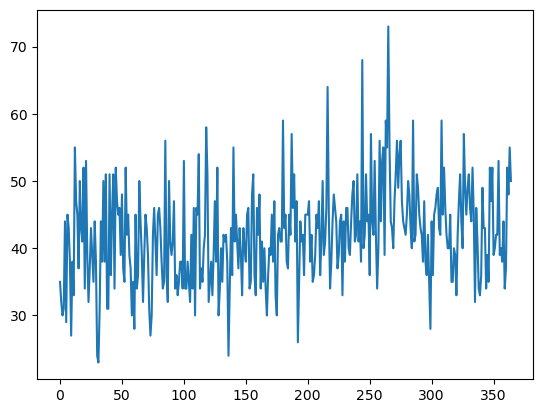

In [42]:
dataviz_df=df2.copy()
dataviz_df['births'].plot()

<Axes: xlabel='date'>

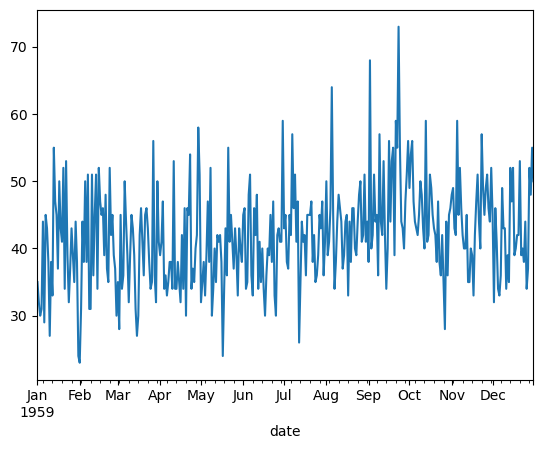

In [43]:
dataviz_df.index=dataviz_df['date']
dataviz_df['births'].plot()

<Axes: xlabel='date'>

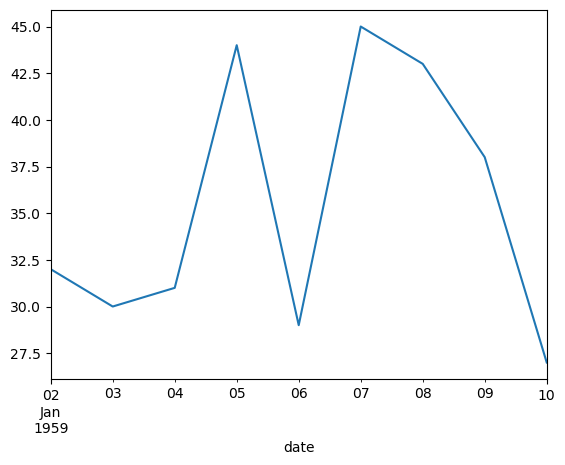

In [44]:
dataviz_df2=dataviz_df[(dataviz_df['date']>'1959-01-01')&(dataviz_df['date']<='1959-01-10')].copy()
dataviz_df2['births'].plot()

In [45]:
import seaborn as sns

<Axes: ylabel='births'>

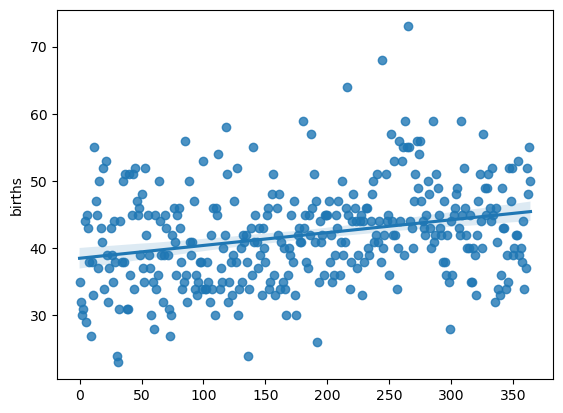

In [46]:
sns.regplot(x=df2.index.values,y=df2['births'])

<Axes: ylabel='births'>

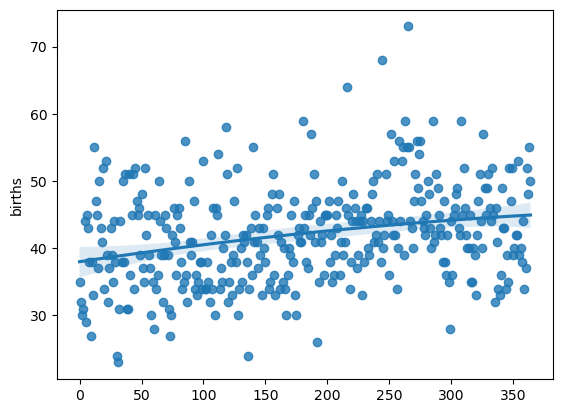

In [47]:
sns.regplot(x=df2.index.values,y=df2['births'],order=2)

In [48]:
miles_df=pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv',header=0,parse_dates=[0])

<Axes: >

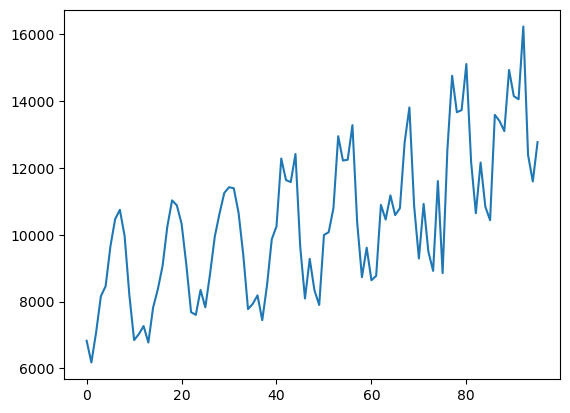

In [49]:
miles_df['MilesMM'].plot()

<Axes: ylabel='MilesMM'>

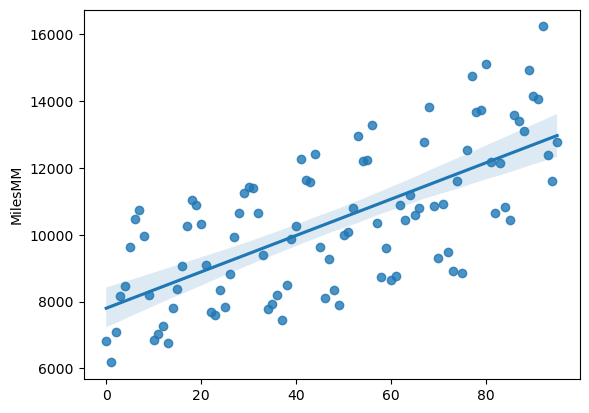

In [50]:
sns.regplot(x = miles_df.index.values, y=miles_df['MilesMM'])

In [51]:
miles_df['year'] = miles_df['Month'].dt.year

In [52]:
miles_df.head()

,Month,MilesMM,year
0,1963-01-01,6827,1963
1,1963-02-01,6178,1963
2,1963-03-01,7084,1963
3,1963-04-01,8162,1963
4,1963-05-01,8462,1963


In [53]:
miles_df.groupby('year')['MilesMM'].mean()

year
1963     8300.250000
1964     8849.333333
1965     9619.250000
1966     9929.500000
1967    10542.916667
1968    10747.916667
1969    11972.000000
1970    13124.750000
Name: MilesMM, dtype: float64

<Axes: xlabel='year'>

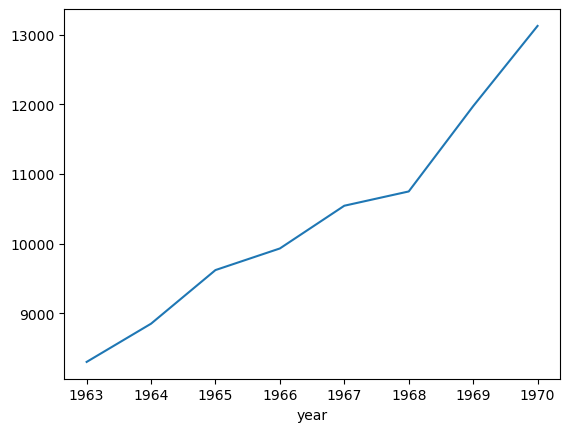

In [54]:
miles_df.groupby('year')['MilesMM'].mean().plot()

Creating Lag plot

In [55]:
miles_df['lag1'] = miles_df['MilesMM'].shift(1)

In [56]:
miles_df.head()

,Month,MilesMM,year,lag1
0,1963-01-01,6827,1963,NaN
1,1963-02-01,6178,1963,6827.0
2,1963-03-01,7084,1963,6178.0
3,1963-04-01,8162,1963,7084.0
4,1963-05-01,8462,1963,8162.0


<Axes: xlabel='lag1', ylabel='MilesMM'>

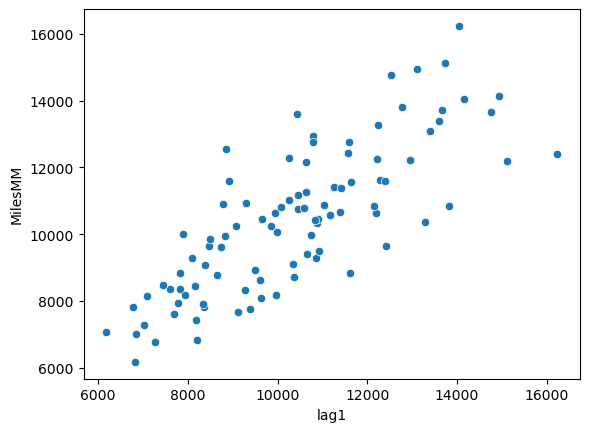

In [58]:
sns.scatterplot(x = miles_df['lag1'], y = miles_df['MilesMM'])

In [59]:
from pandas.plotting import lag_plot

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

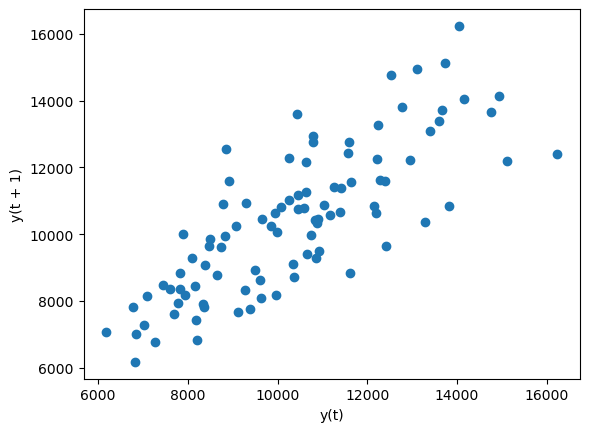

In [61]:
lag_plot(miles_df['MilesMM'])

In [62]:
from pandas.plotting import autocorrelation_plot

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

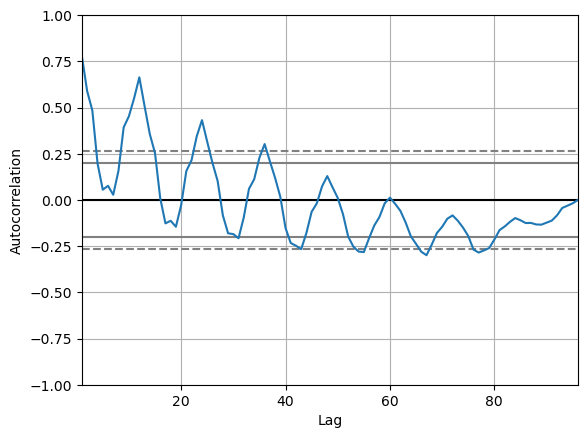

In [63]:
autocorrelation_plot(miles_df['MilesMM'])